## IRIS FLOWER CLASSIFICATION
 **Statement:** Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements.

importing necessary libraries

## Data collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## Exploring the data

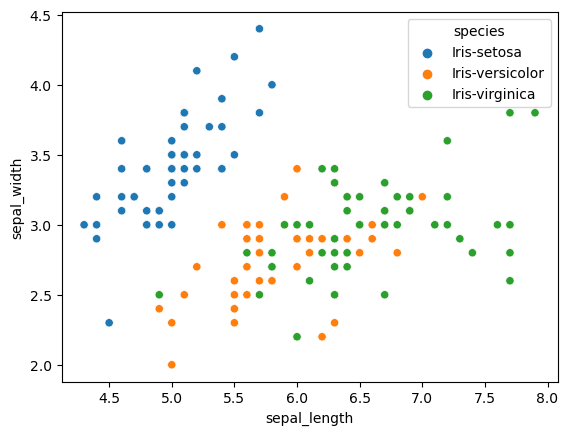

In [6]:
sns.scatterplot(x="sepal_length",y="sepal_width",data=df,hue="species")
plt.show()

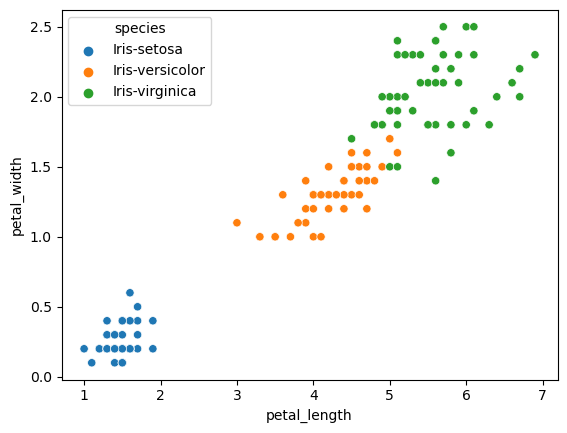

In [7]:
sns.scatterplot(x="petal_length",y="petal_width",data=df,hue="species")
plt.show()

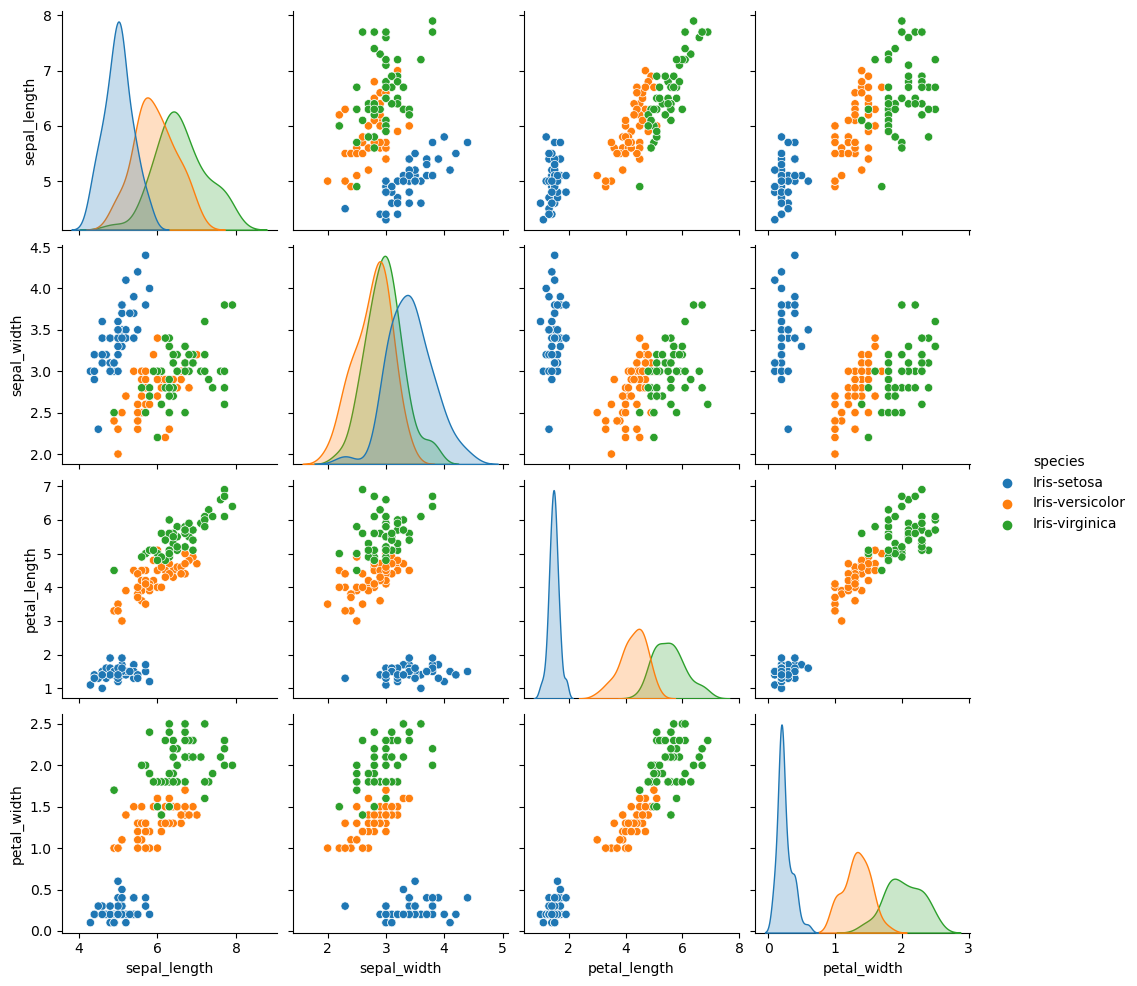

In [8]:
sns.pairplot(df,hue='species')
plt.show()

## Data preprocessing

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No missing values

In [10]:
df.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

No skew values

## splitting the data

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['species'])

x=pd.get_dummies(df.drop('species',axis=1),drop_first=True)

from sklearn.model_selection import train_test_split
x_train1,x_test,y_train1,y_test=train_test_split(x,y,test_size=0.2,random_state=19)
print(len(x_train1))
print(len(x_test))



120
30


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train1=scaler.fit_transform(x_train1)
x_test=scaler.transform(x_test)

## Modelling

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


## Best random State

In [14]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

Train = []
Test = []
cv = []

for i in range(0, 100):
    # Split the data into train and test sets with a different random_state in each iteration
    x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=i)

    # Modeling
    model = LogisticRegression()
    model.fit(x_train, y_train)

    # Prediction
    ypred_train = model.predict(x_train)
    ypred_test = model.predict(x_test)

    # Calculate scores and append to lists
    Train.append(model.score(x_train, y_train))
    Test.append(model.score(x_test, y_test))
    cv.append(cross_val_score(model, x, y, cv=5).mean())

em = pd.DataFrame({"Train": Train, "Test": Test, "cv": cv})

# Filter for rows where the absolute differences are within the specified threshold
gm = em[(abs(em['Train'] - em["Test"]) <= 0.05) & (abs(em['Test'] - em['cv']) <= 0.05)]

# Find the index with the maximum 'Test' score
best_random_state = gm["Test"].idxmax()

print("Best random_state:", best_random_state)


Best random_state: 0


**Logistic_regression**

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(x_train1,y_train1)

ypred_train=model.predict(x_train1)
ypred_test=model.predict(x_test)

log_train_accuracy=accuracy_score(y_train1,ypred_train)
log_test_accuracy=accuracy_score(y_test,ypred_test)
scores=cross_val_score(model,x,y)
log_cvs=scores.mean()

print("train_accuracy:",log_train_accuracy)
print("test accuracy:",log_test_accuracy)
print("cvs:",log_cvs)

train_accuracy: 0.95
test accuracy: 0.3333333333333333
cvs: 0.9733333333333334


**Decision Tree**

In [16]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier()

param_grid={'criterion':["gini","entropy"],'max_depth':[1,2,3,4,5]}

grid=GridSearchCV(estimator,param_grid,scoring='accuracy')

grid.fit(x_train1,y_train1)
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [17]:
grid.best_estimator_.feature_importances_
feats= pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=x.columns,columns=["Feature Importance"])
feats_imp=feats[feats["Feature Importance"]>0]
important_features_list=feats_imp.index.to_list()

In [18]:
x_imp=x[important_features_list]
x_train,x_test,y_train,y_test=train_test_split(x_imp,y,test_size=0.2,random_state=0)
final_dt_model=DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=0)
final_dt_model.fit(x_train,y_train)

ypred_train=final_dt_model.predict(x_train)
ypred_test=final_dt_model.predict(x_test)
dt_train_accuracy=accuracy_score(ypred_train,y_train)
dt_test_accuracy=accuracy_score(ypred_test,y_test)
dt_cvs=cross_val_score(final_dt_model,x,y,cv=5).mean()

print("train accuracy:",dt_train_accuracy)
print("test accuracy:",dt_test_accuracy)
print("cross val score:",dt_cvs)

train accuracy: 0.9583333333333334
test accuracy: 0.9666666666666667
cross val score: 0.9333333333333332


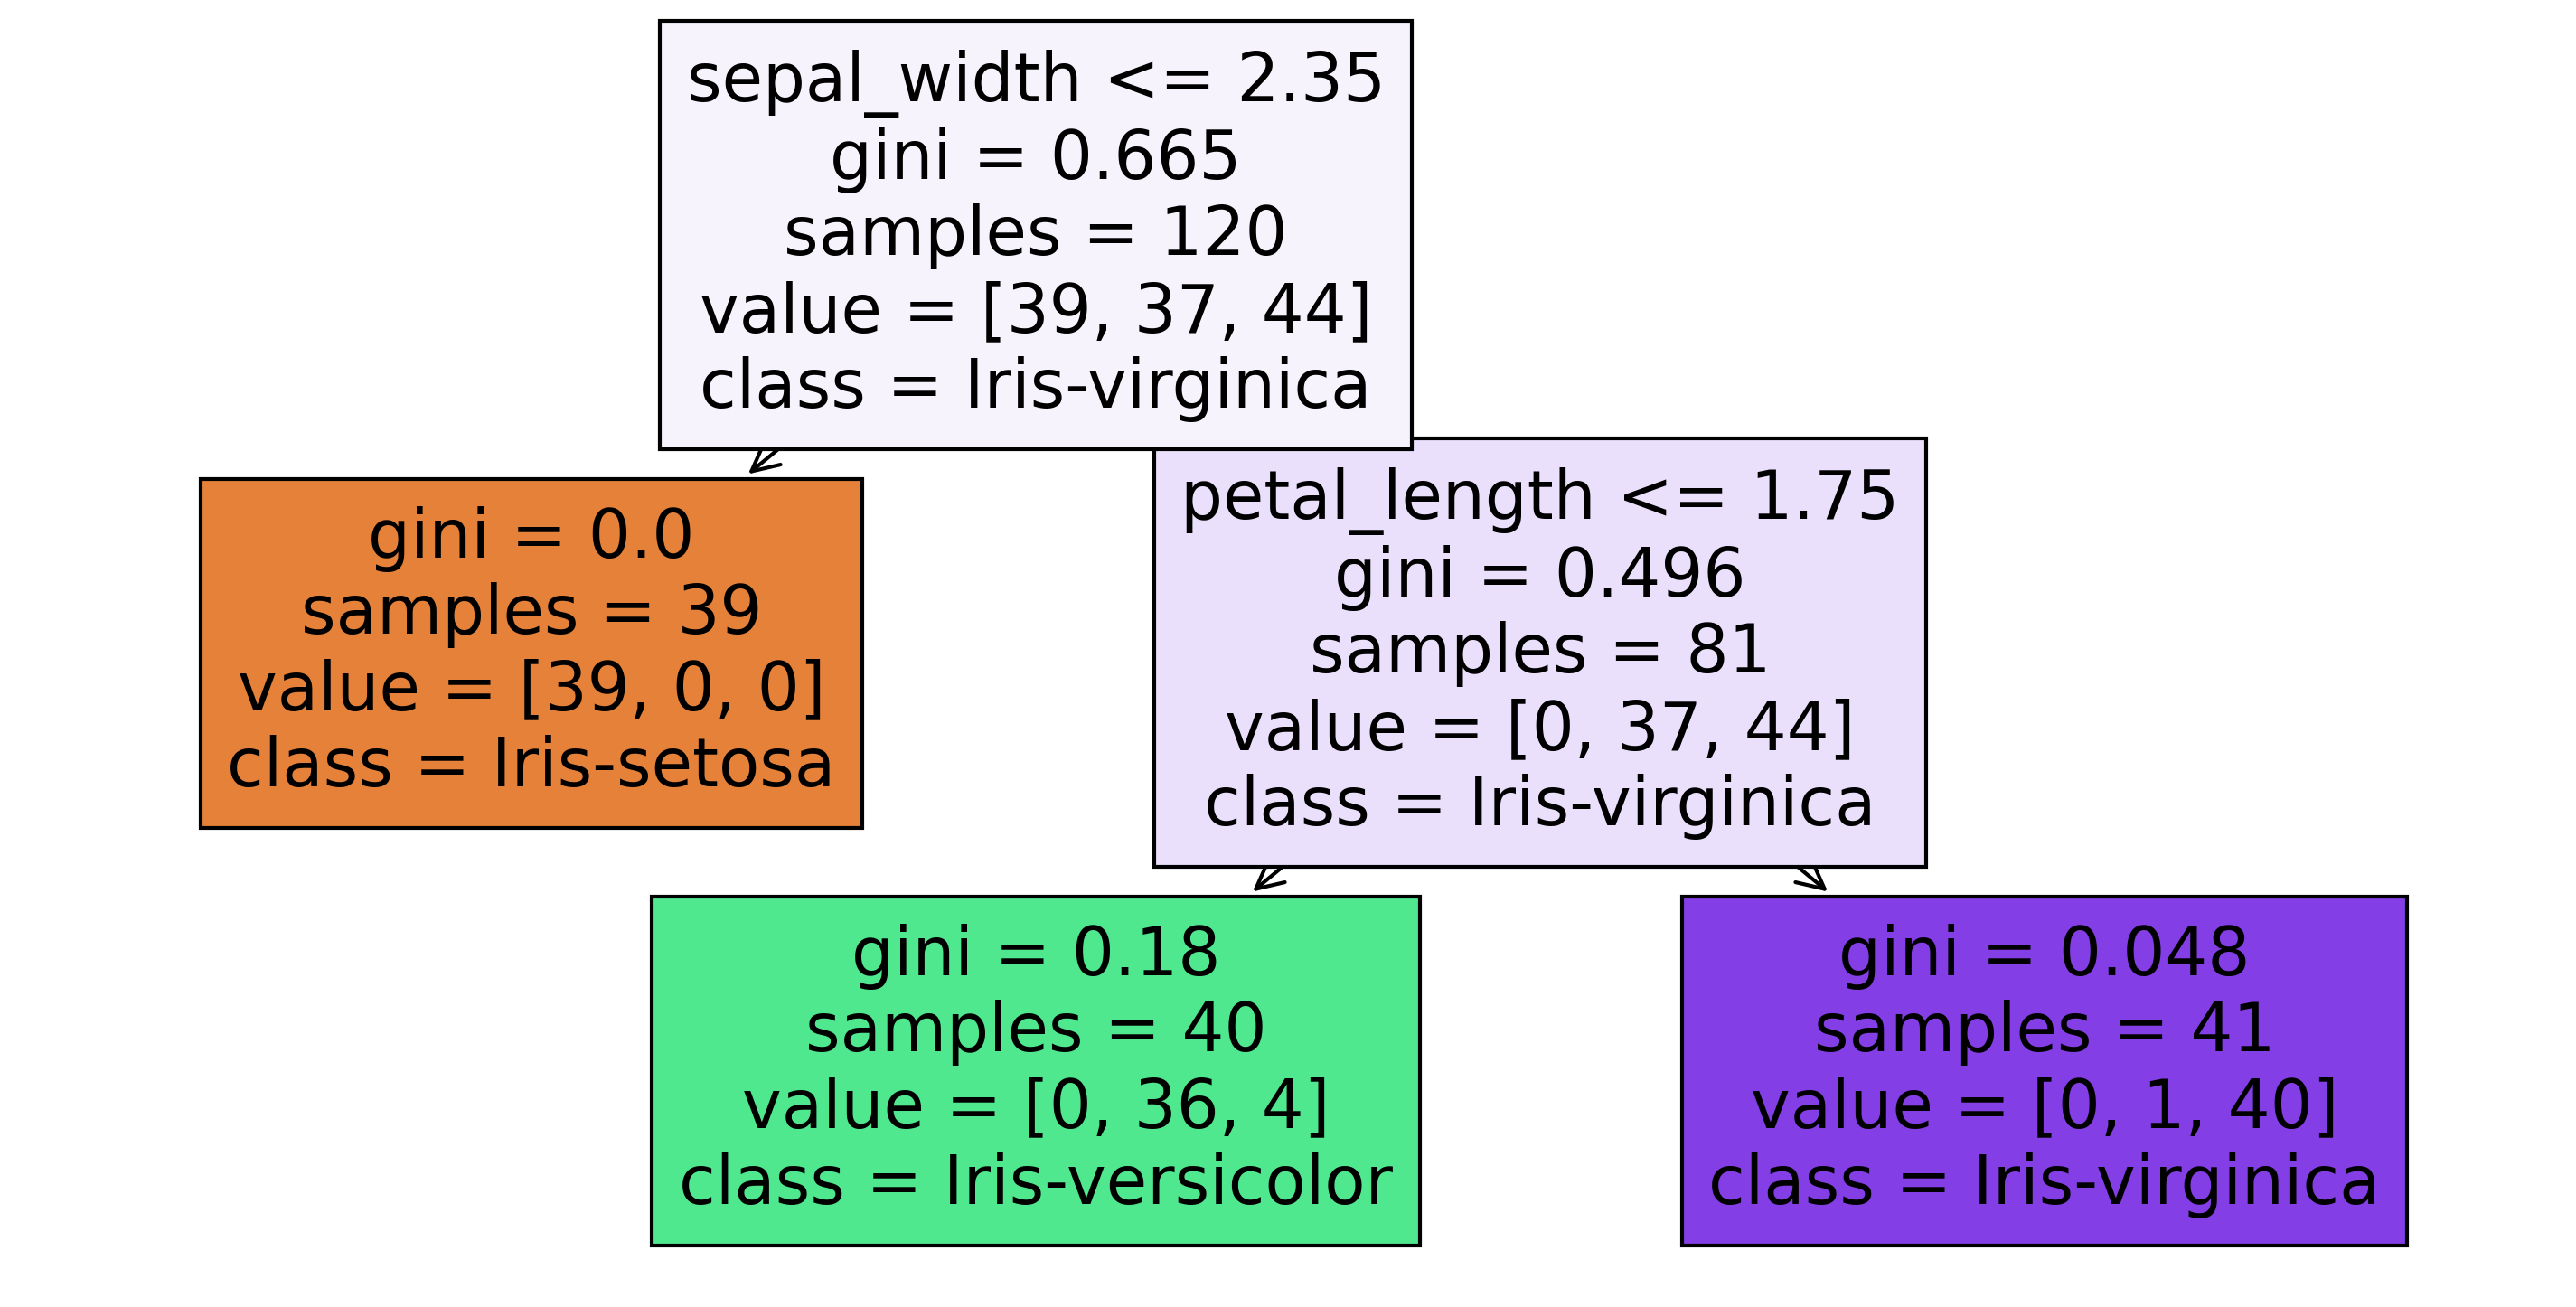

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dt_default is your trained decision tree model
# Ensure that dt_default is trained before calling plot_tree

plt.figure(figsize=(12,6), dpi=300)
plot_tree(final_dt_model, filled=True, feature_names=["sepal_length","sepal_width","petal_length","petal_width"], class_names=["Iris-setosa",
"Iris-versicolor",
"Iris-virginica"])
plt.show()


**Random Forest**

In [20]:
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier(random_state=0)
param_grid={'n_estimators':list(range(1,20))}
grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
grid.fit(x_train1,y_train1)
grid.best_params_

{'n_estimators': 3}

In [21]:
grid.best_estimator_.feature_importances_
feats_imp = pd.DataFrame(data=grid.best_estimator_.feature_importances_, index=x.columns, columns=['Feature Importance'])
important_feats = feats_imp[feats_imp['Feature Importance'] > 0]
important_features_list = important_feats.index.to_list()

In [22]:
x_imp=x[important_features_list]
x_train,x_test,y_train,y_test=train_test_split(x_imp,y,test_size=0.2,random_state=0)

final_rf_model=RandomForestClassifier(n_estimators=12,random_state=0)
final_rf_model.fit(x_train,y_train)

ypred_train=final_rf_model.predict(x_train)
ypred_test=final_rf_model.predict(x_test)

rf_train_accuracy=accuracy_score(ypred_train,y_train)
rf_test_accuracy=accuracy_score(ypred_test,y_test)
rf_cvs=cross_val_score(final_rf_model,x,y,cv=5).mean()
##evalution
print("train accuracy:",rf_train_accuracy)
print("test accuracy:",rf_test_accuracy)
print("cross val score:",rf_cvs)

train accuracy: 0.9833333333333333
test accuracy: 0.9666666666666667
cross val score: 0.9533333333333334


**AdaBoost Classifier**

In [23]:
from sklearn.ensemble import AdaBoostClassifier

estimator=AdaBoostClassifier()

param_grid={'n_estimators':list(range(1,20))}

grid=GridSearchCV(estimator,param_grid,scoring='accuracy')

grid.fit(x_train1,y_train1)
grid.best_params_

{'n_estimators': 2}

In [24]:
grid.best_estimator_.feature_importances_
feats=pd.DataFrame(index=x.columns,data=grid.best_estimator_.feature_importances_,columns=['Importance'])
imp_features=feats[feats["Importance"]>0.01]
imp_features_list=feats[feats["Importance"]>0.01].index.to_list()

x_imp=x[important_features_list]

In [25]:

x_imp=x[important_features_list]

x_train,x_test,y_train,y_test=train_test_split(x_imp,y,test_size=0.2,random_state=0)
ada_model=AdaBoostClassifier(n_estimators=14)
ada_model.fit(x_train,y_train)


ypred_train=ada_model.predict(x_train)
ypred_test=ada_model.predict(x_test)

ad_train_accuracy=accuracy_score(y_train,ypred_train)
ad_test_accuracy=accuracy_score(y_test,ypred_test)
ad_cvs=cross_val_score(ada_model,x,y).mean()
##evalution
print("train accuracy:",ad_train_accuracy)
print("test accuracy:",ad_test_accuracy)
print("cross val score:",ad_cvs)

train accuracy: 0.9583333333333334
test accuracy: 0.9666666666666667
cross val score: 0.9466666666666667


**Gradient Boosting**

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
estimator =GradientBoostingClassifier()
param_grid={'n_estimators':[1,5,10,15,20],'learning_rate':[0.1,0.2,0.3,0.5,0.8,1]}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train1,y_train1)
grid.best_params_

{'learning_rate': 0.5, 'n_estimators': 1}

In [27]:
grid.best_estimator_.feature_importances_
feats=pd.DataFrame(index=x.columns,data=grid.best_estimator_.feature_importances_,columns=['Importance'])
imp_features=feats[feats["Importance"]>0.01]
imp_features_list=feats[feats["Importance"]>0.01].index.to_list()
imp_features_list

['petal_length', 'petal_width']

In [28]:
# Select important features
x_imp = x[imp_features_list]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_imp, y, test_size=0.2, random_state=0)

# Modeling with Gradient Boosting Classifier
gb_bhp = GradientBoostingClassifier(n_estimators=15, learning_rate=0.5)
gb_bhp.fit(x_train, y_train)

# Prediction
ypred_train = gb_bhp.predict(x_train)
ypred_test = gb_bhp.predict(x_test)

# Calculate accuracy scores
gb_train_accuracy = accuracy_score(y_train, ypred_train)
gb_test_accuracy = accuracy_score(y_test, ypred_test)
gb_cvs = cross_val_score(gb_bhp, x, y).mean()

# Evaluation
print("train accuracy:", gb_train_accuracy)
print("test accuracy:", gb_test_accuracy)
print("cross val score:", gb_cvs)


train accuracy: 0.9916666666666667
test accuracy: 1.0
cross val score: 0.9600000000000002


**XGBoost**

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Assuming y_train1 is a pandas Series
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train1)

estimator = XGBClassifier()
param_grid = {'n_estimators': [10, 20, 30, 40], 'max_depth': [2, 3, 4, 5, 6], 'gamma': [0, 0.2, 0.3, 0.5, 1]}

grid = GridSearchCV(estimator, param_grid, scoring='accuracy')
grid.fit(x_train1, y_train_encoded)
grid.best_params_


{'gamma': 0, 'max_depth': 2, 'n_estimators': 10}

In [30]:
grid.best_estimator_.feature_importances_
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                  index=x.columns,columns=["Importance"])
important_features=feats[feats["Importance"]>0.01]
imp_feature_list=feats[feats["Importance"]>0.01].index.to_list()

In [31]:
x_imp=x[imp_feature_list]
x_train, x_test, y_train, y_test = train_test_split(x_imp, y, test_size=0.2, random_state=20)
xgb_model=XGBClassifier(n_estimators=10,max_depth=2,gamma=0)
xgb_model.fit(x_train,y_train)

##
ypred_train=xgb_model.predict(x_train)
ypred_test=xgb_model.predict(x_test)

xgb_train_accuracy = accuracy_score(y_train, ypred_train)
xgb_test_accuracy = accuracy_score(y_test, ypred_test)
xgb_cvs = cross_val_score(gb_bhp, x, y).mean()

# Evaluation
print("train accuracy:", xgb_train_accuracy)
print("test accuracy:", xgb_test_accuracy)
print("cross val score:", xgb_cvs)

train accuracy: 0.975
test accuracy: 0.8666666666666667
cross val score: 0.9600000000000002


In [32]:
final_data=pd.DataFrame({"Models":['Logistic','DT','RF','ADB',
                                  'GB','XGB'],
                        "Train accuracy":[log_train_accuracy,
                                          dt_train_accuracy,
                                          rf_train_accuracy,
                                          ad_train_accuracy,
                                          gb_train_accuracy,
                                          xgb_train_accuracy],
                        "Test accuaracy":[log_test_accuracy,
                                          dt_test_accuracy,
                                          rf_test_accuracy,
                                          ad_test_accuracy,
                                          gb_test_accuracy,
                                          xgb_test_accuracy],
                        "CV_score":[log_cvs,dt_cvs,rf_cvs,ad_cvs,gb_cvs,
                                    xgb_cvs]})

In [33]:
final_data

,Models,Train accuracy,Test accuaracy,CV_score
0,Logistic,0.950000,0.333333,0.973333
1,DT,0.958333,0.966667,0.933333
2,RF,0.983333,0.966667,0.953333
3,ADB,0.958333,0.966667,0.946667
4,GB,0.991667,1.000000,0.960000
5,XGB,0.975000,0.866667,0.960000


## ADABOOST is the best model

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[ 8,  0,  0],
       [ 1, 10,  0],
       [ 0,  3,  8]], dtype=int64)

## Deployment of the best model

In [35]:
from joblib import dump
dump(ada_model,"IRIS.joblib")

['IRIS.joblib']